**Imports**

In [1]:
import torch
from torchvision.models.segmentation import fcn_resnet50
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive


**Define Model**

In [2]:
model = fcn_resnet50(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:00<00:00, 153MB/s]


**Initialize Image Models**

In [3]:
image_files = ['/content/images/im1.jpg', '/content/images/im2.jpg', '/content/images/im3.jpg', '/content/images/im4.jpg', '/content/images/im5.jpg']

**Process each image and display feature maps and segmentation**

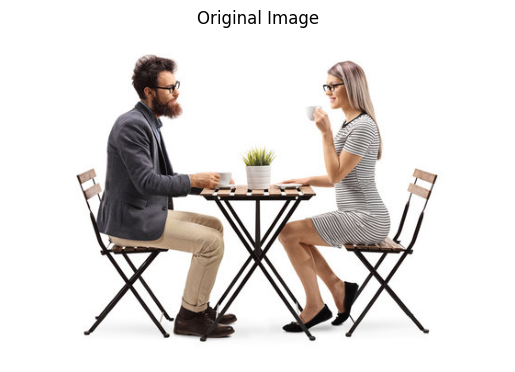

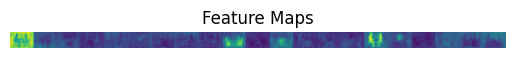

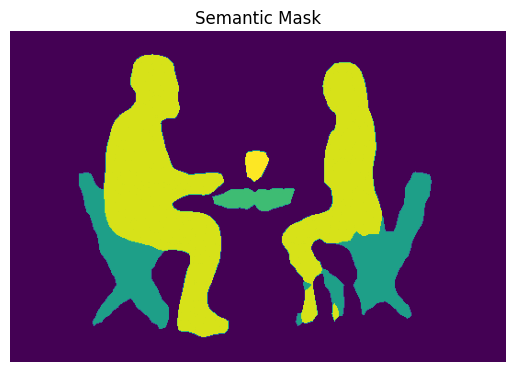

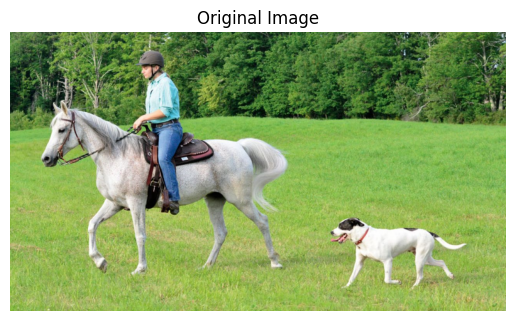

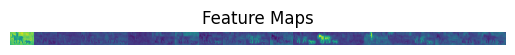

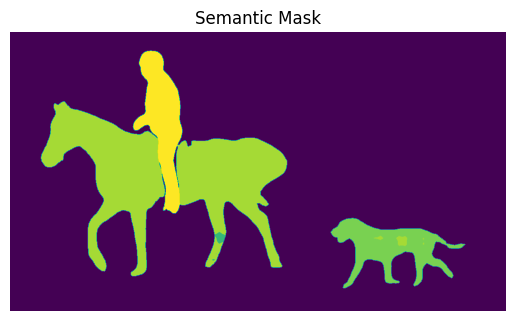

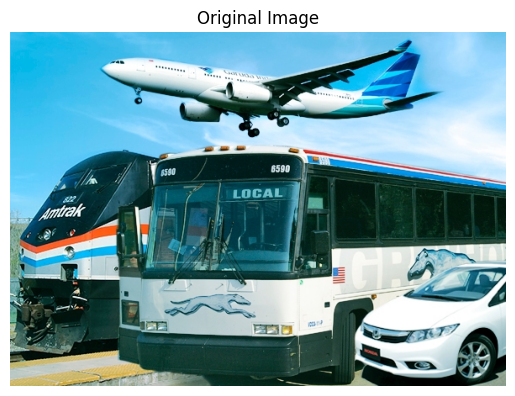

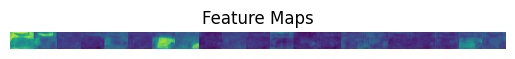

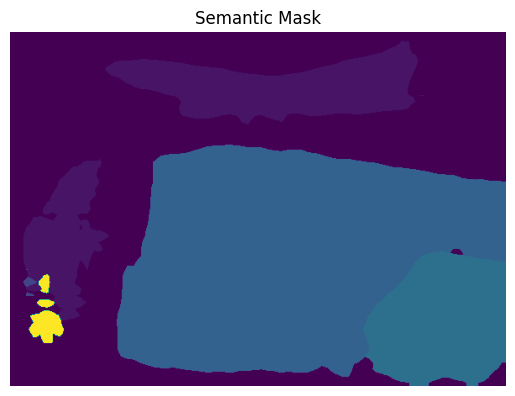

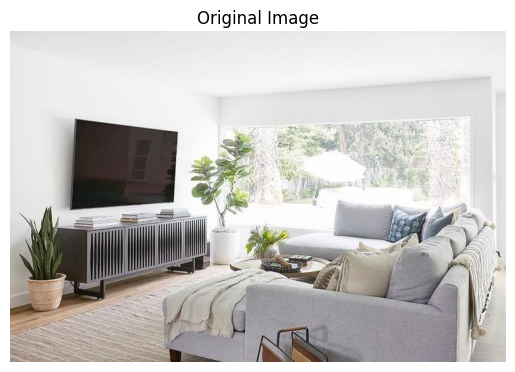

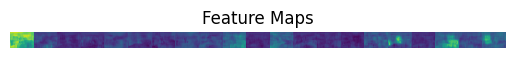

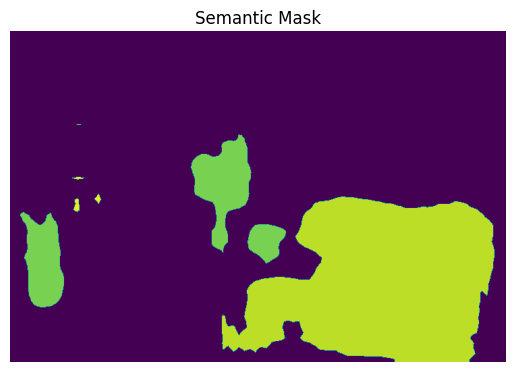

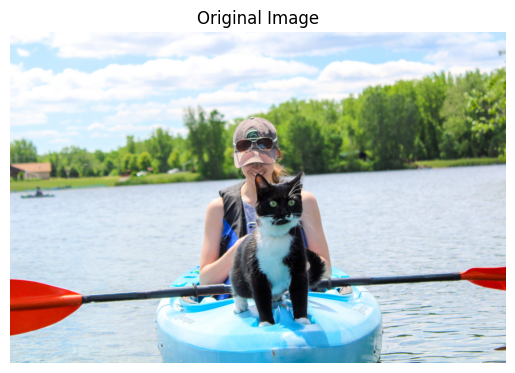

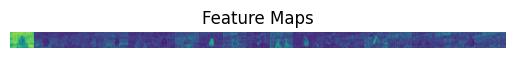

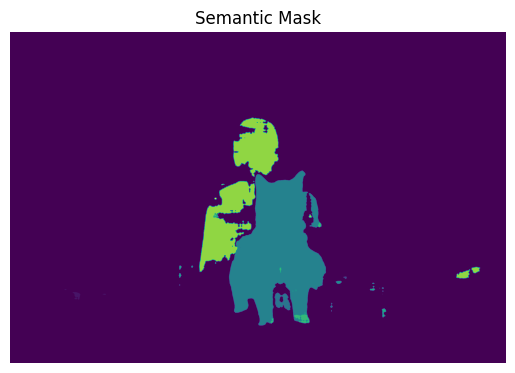

In [11]:
for image_file in image_files:
    # Load image from file
    path_list = image_file.split('.')
    split_path = path_list[0].split('/')

    image = Image.open(image_file).convert("RGB")

    # Preprocess the image
    input_tensor = F.to_tensor(image).unsqueeze(0)

    # Forward pass through the model
    with torch.no_grad():
        output = model(input_tensor)['out']

    # Save all the feature maps (not segmentations) in 1 image (as tiles)
    feature_maps = output[0].detach().cpu().numpy()
    # Assuming feature_maps shape is (21, H, W), where H and W are the height and width of the feature maps
    tiled_feature_maps = np.concatenate(feature_maps, axis=1)

     # Display the original image
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    # Display feature maps
    plt.imshow(tiled_feature_maps, cmap='viridis')
    plt.axis('off')
    plt.title("Feature Maps")
    plt.show()

    # Create the final segmentation image
    _, predicted = torch.max(output, 1)
    segmentation = predicted[0].detach().cpu().numpy()

    # Display segmentation
    plt.imshow(segmentation)
    plt.axis('off')
    plt.title("Semantic Mask")
    plt.show()

    # Save images
    plt.imsave('/' + split_path[1] + '/featuremaps/' + split_path[3] + '_feature_map.' + path_list[1], tiled_feature_maps)
    plt.imsave('/' + split_path[1] + '/segmentations/' + split_path[3] + '_segmentation.' + path_list[1], segmentation)